In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
# from tensorflow.keras.layers import Dense
from tensorflow import keras

# 단변량 입력

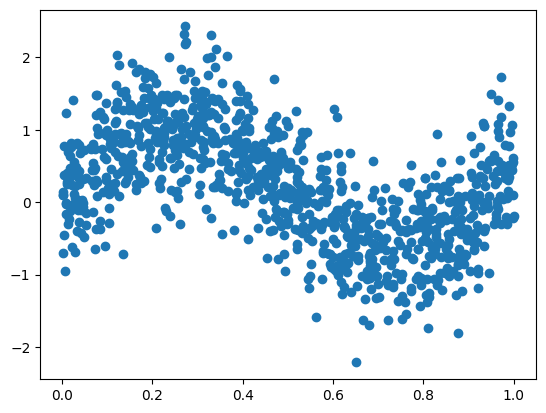

In [17]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()

plt.figure()
plt.scatter(X, y_label)
plt.show()

# 회귀에서 출력 활성화 함수는 기본 사용(linear)

# 이진분류는 출력 층을 시그모이드
* 이진분류는 노드 1개
# 다중분류는 소프트맥스
* 클래스가 여러개면, 개수에 맞춰서 출력 노드를 늘려야 함

# relu 계열, gelu계열 많이 씀

* 전연결층 / 덴스 계층 / FNC / affine layer 어파인 계층 / 덴스는 별칭같은 느낌(공식문서에서는 안 씀)

* 노드의 개수와 output의 개수가 똑같음
* 여기에서의 None은 모른다의 뜻(데이터의 개수)

# 모델 생성

In [31]:
# 거의 쓰지 않는 문법
# 모델의 구조
model = keras.models.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(6, activation='sigmoid'),
    keras.layers.Dense(4, activation='sigmoid'),
    keras.layers.Dense(1)
])

# 모델 가중치, SGD(확률적 경사 하강법, 가장 기본)
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')
# summary()는 항상 확인해야 함 !꼭!
model.summary()

# 6은 1x6에서 나머지 6개는 편향, 4는 6x4에서 나머지 4개는 편향, 1은 4x1에서 나머지 1개는 편향

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 6)                 12        
                                                                 
 dense_25 (Dense)            (None, 4)                 28        
                                                                 
 dense_26 (Dense)            (None, 1)                 5         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


# 모델 학습

In [28]:
model.fit(X, y_label, epochs=100)

Epoch 1/100


32/32 [==============================] - 0s 4ms/step - loss: 0.6147
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5989
Epoch 3/100
32/32 [==============================] - 0s 976us/step - loss: 0.5822
Epoch 4/100
32/32 [==============================] - 0s 961us/step - loss: 0.5616
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5192
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 991us/step - loss: 0.4596
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4486
Epoch 9/100
32/32 [==============================] - 0s 979us/step - loss: 0.4452
Epoch 10/100
32/32 [==============================] - 0s 967us/step - loss: 0.4444
Epoch 11/100
32/32 [==============================] - 0s 968us/step - loss: 0.4460
Epoch 12/100
32/32 [==============================] - 0s 947us/step - loss: 0.4412
Epoch 13/100
32/32 [===============

In [29]:
tf.test.is_gpu_available()

True

4/4 [==============================] - 0s 2ms/step


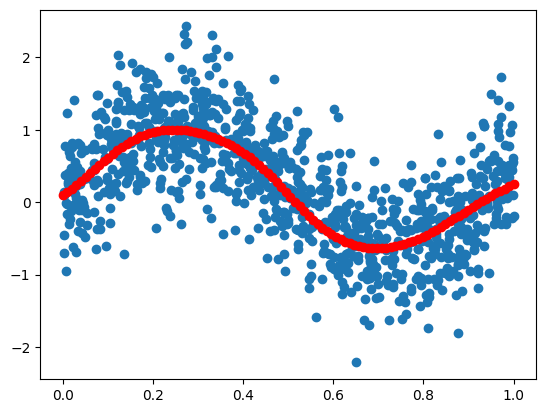

In [30]:
domain = np.linspace(0, 1, 100).reshape(-1, 1)
y_hat = model.predict(domain)
plt.figure()
plt.scatter(X, y_label)
plt.scatter(domain, y_hat, color='r') # 모델의 예측 결과
plt.show()

In [16]:
from tensorflow.keras.layers import Input, Dense
# import tensorflow.keras.Model as Model
from tensorflow.keras import Model

# 아래의 문법을 자주 씀 / 자유로움 / 복잡하지 않음 / 연결관계가 명확함
inputs = Input(shape=(1,))
x = Dense(6, activation='sigmoid')(inputs)
x = Dense(4, activation='sigmoid')(x) # 은닉층들은 그냥 덮어써버림
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# 모델 가중치, SGD(확률적 경사 하강법)
optimizer = keras.optimizers.SGD(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='mse')
# summary()는 항상 확인해야 함 !꼭!
model.summary()

# 6은 1x6에서 나머지 6개는 편향, 4는 6x4에서 나머지 4개는 편향, 1은 4x1에서 나머지 1개는 편향

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_9 (Dense)             (None, 6)                 12        
                                                                 
 dense_10 (Dense)            (None, 4)                 28        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


# 기울기 소실 <-> 기울기 폭발

# SGD 는 기본, Adam을 많이 씀